# Forward modelling
In this tutorial, we will see how to use pyR2 API to do forward modelling.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append((os.path.relpath('../src'))) # add here the relative path of the API folder

import numpy as np # numpy for electrode generation
from resipy.R2 import R2


API path =  /media/jkl/data/phd/tmp/pyr2/src/resipy
ResIPy version =  1.1.6


In [2]:
k = R2() # create R2 object

Working directory is: /media/jkl/data/phd/tmp/pyr2/src/resipy/invdir
clearing the dirname


First we need to design some electrodes. We will use numpy functions for this.

In [3]:
elec = np.zeros((24,3))
elec[:,0] = np.arange(0, 24*0.5, 0.5) # with 0.5 m spacing and 24 electrodes
k.setElec(elec)
print(k.elec)

[[ 0.   0.   0. ]
 [ 0.5  0.   0. ]
 [ 1.   0.   0. ]
 [ 1.5  0.   0. ]
 [ 2.   0.   0. ]
 [ 2.5  0.   0. ]
 [ 3.   0.   0. ]
 [ 3.5  0.   0. ]
 [ 4.   0.   0. ]
 [ 4.5  0.   0. ]
 [ 5.   0.   0. ]
 [ 5.5  0.   0. ]
 [ 6.   0.   0. ]
 [ 6.5  0.   0. ]
 [ 7.   0.   0. ]
 [ 7.5  0.   0. ]
 [ 8.   0.   0. ]
 [ 8.5  0.   0. ]
 [ 9.   0.   0. ]
 [ 9.5  0.   0. ]
 [10.   0.   0. ]
 [10.5  0.   0. ]
 [11.   0.   0. ]
 [11.5  0.   0. ]]


Now let's create a mesh.

computed DOI : -3.67
trian
Generating gmsh input file...

doi in gmshWrap.py: -3.666667
dp_len in gmshWrap.py: 11.500000
adding surface points and electrodes to input file...
probing for boundaries and other additions to the mesh
0 polygons added to input file
0 boundary(ies) added to input file
writing .geo to file completed, save location:
/media/jkl/data/phd/tmp/pyr2/src/resipy/invdir

parsing gmsh mesh...

importing node coordinates...
reading connection matrix
ignoring 0 non-triangle elements in the mesh file, as they are not required for R2
0 element node orderings had to be corrected becuase they were found to be orientated clockwise

written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/resipy/invdir/mesh.dat
Mesh plotted in 0.09037 seconds


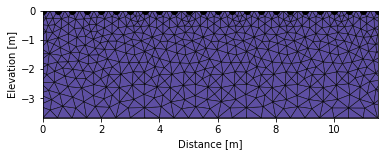

In [8]:
k.createMesh(typ='trian', show_output=False, res0=200) # let's create the mesh based on these electrodes position
k.showMesh()

Based on this mesh, we can defined regions and assign them conductivities. There is an interactive way to do it when working outside of the jupyter notebook in interactive mode or GUI. Here we will see the pure API based way to do it using `R2.addRegion()`.

In [5]:
help(k.addRegion) # to display the help of the method

Help on method addRegion in module resipy.R2:

addRegion(xy, res0=100, phase0=1, blocky=False, fixed=False, ax=None) method of resipy.R2.R2 instance
    Add region according to a polyline defined by `xy` and assign it
    the starting resistivity `res0`.
    
    Parameters
    ----------
    xy : array
        Array with two columns for the x and y coordinates.
    res0 : float, optional
        Resistivity values of the defined area.
    phase0 : float, optional
        Read only if you choose the cR2 option. Phase value of the defined
        area in mrad
    blocky : bool, optional
        If `True` the boundary of the region will be blocky if inversion
        is block inversion.
    fixed : bool, optional
        If `True`, the inversion will keep the starting resistivity of this
        region.
    ax : matplotlib.axes.Axes
        If not `None`, the region will be plotted against this axes.



Mesh plotted in 0.13369 seconds
38 elements selected
38 elements selected


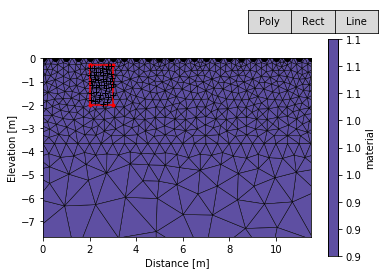

In [10]:
k.addRegion(np.array([[2,-0.3],[2,-2],[3,-2],[3,-0.3],[2,-0.3]]), 200)
# first specify the path of the region and then its resistivity value in Ohm.m

We then need to define the sequence that we will use. We can easily create a dipole-dipole sequence using `R2.createSequence()` or import one using `R2.importSequence()`.

In [7]:
help(k.createSequence) # don't hersitate to use the help to know more about each method

Help on method createSequence in module resipy.R2:

createSequence(params=[('dpdp1', 1, 8)]) method of resipy.R2.R2 instance
    Create a dipole-dipole sequence.
    
    Parameters
    ----------
    params : list of tuple, optional
        Each tuple is the form (<array_name>, param1, param2, ...)
        Types of sequences available are : 'dpdp1','dpdp2','wenner_alpha',
        'wenner_beta', 'wenner_gamma', 'schlum1', 'schlum2', 'multigrad'.
    
    Examples
    --------
    >>> k = R2()
    >>> k.setElec(np.c_[np.linspace(0,5.75, 24), np.zeros((24, 2))])
    >>> k.createMesh(typ='trian')
    >>> k.createSequence([('dpdp1', 1, 8), ('wenner_alpha', 1), ('wenner_alpha', 2)])



In [6]:
k.createSequence([('dpdp1', 1, 10)]) # create a dipole-dipole of diple spacing of 1 (=skip 0) with 10 levels
print(k.sequence) # the sequence is stored inside the R2 object

[[ 1  2  3  4]
 [ 2  3  4  5]
 [ 3  4  5  6]
 [ 4  5  6  7]
 [ 5  6  7  8]
 [ 6  7  8  9]
 [ 7  8  9 10]
 [ 8  9 10 11]
 [ 9 10 11 12]
 [10 11 12 13]
 [11 12 13 14]
 [12 13 14 15]
 [13 14 15 16]
 [14 15 16 17]
 [15 16 17 18]
 [16 17 18 19]
 [17 18 19 20]
 [18 19 20 21]
 [19 20 21 22]
 [20 21 22 23]
 [21 22 23 24]
 [ 1  2  4  5]
 [ 2  3  5  6]
 [ 3  4  6  7]
 [ 4  5  7  8]
 [ 5  6  8  9]
 [ 6  7  9 10]
 [ 7  8 10 11]
 [ 8  9 11 12]
 [ 9 10 12 13]
 [10 11 13 14]
 [11 12 14 15]
 [12 13 15 16]
 [13 14 16 17]
 [14 15 17 18]
 [15 16 18 19]
 [16 17 19 20]
 [17 18 20 21]
 [18 19 21 22]
 [19 20 22 23]
 [20 21 23 24]
 [ 1  2  5  6]
 [ 2  3  6  7]
 [ 3  4  7  8]
 [ 4  5  8  9]
 [ 5  6  9 10]
 [ 6  7 10 11]
 [ 7  8 11 12]
 [ 8  9 12 13]
 [ 9 10 13 14]
 [10 11 14 15]
 [11 12 15 16]
 [12 13 16 17]
 [13 14 17 18]
 [14 15 18 19]
 [15 16 19 20]
 [16 17 20 21]
 [17 18 21 22]
 [18 19 22 23]
 [19 20 23 24]
 [ 1  2  6  7]
 [ 2  3  7  8]
 [ 3  4  8  9]
 [ 4  5  9 10]
 [ 5  6 10 11]
 [ 6  7 11 12]
 [ 7  8 12

Then comes the forward modelling part itself. The forward modelling will run R2, cR2, ... in forward mode inside a `fwd` directory inside the working directory. The resulting apparent resistivity are then embeded inside a `Survey` object and directly available for inversion for instance.

Writing .in file...
done

Writing protocol.dat ...
done

Running forward model


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v3.3 <<

 >> D a t e : 28 - 05 - 2019
 >> My beautiful survey
 >> F o r w a r d   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from resistivity.dat

 Measurements read:   165     Measurements rejected:     0

 >> Total Memory required is:          0.018 Gb
Inf or NaN: filterData: 0 / 165 quadrupoles removed.
strange quadrupoles: filterData: 0 / 165 quadrupoles removed.
165/165 reciprocal measurements NOT found.
0 measurements error > 20 %
Forward modelling done.


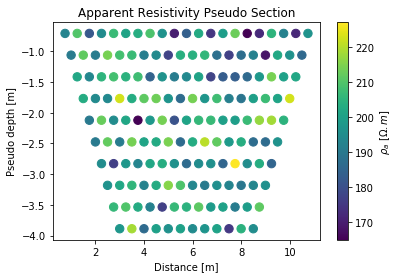

In [9]:
k.forward(noise=0.05) # forward modelling with 5 % noise added to the output

We can already see that the pseudo-section already show clearly the import on the region we defined. We can now invert these apparent resistivities. Inverting the forward models allow the user to see if the parameters of the surveys (the sequence and electrode spacing) were optimium to resolve the target. If needed he can change them and do the whole process again.

In [10]:
k.invert()

Writing .in file and protocol.dat ...
Setting a homogeneous background model as the survey to                   be inverted is from a forward model already.
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/resipy/invdir/mesh.dat
done

--------------------- MAIN INVERSION ------------------



 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v3.3 <<

 >> D a t e : 22 - 04 - 2019
 >> My beautiful survey
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:   165     Measurements rejected:     0
   Geometric mean of a

reading  /media/jkl/data/phd/tmp/pyr2/src/resipy/invdir/f001_res.vtk ...done
no sensitivities in mesh object to plot
Mesh plotted in 0.16753 seconds
Mesh plotted in 0.16276 seconds


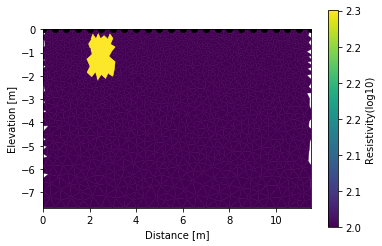

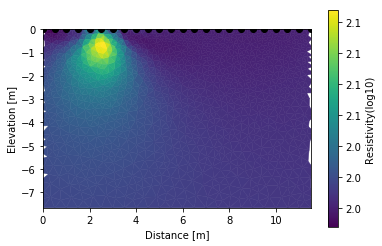

In [11]:
k.showResults(index=0) # show the initial model
k.showResults(index=1, sens=False) # show the inverted model

## In a nutshell

Working directory is: /media/jkl/data/phd/tmp/pyr2/src/resipy/invdir
clearing the dirname
computed DOI : -7.67
Using a quadrilateral mesh.
quad
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/resipy/invdir/mesh.dat
Mesh plotted in 0.32181 seconds
88 elements selected
88 elements selected
Writing .in file...
done

Writing protocol.dat ...
done

Running forward model


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v3.3 <<

 >> D a t e : 22 - 04 - 2019
 >> My beautiful survey
 >> F o r w a r d   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from resistivity.dat

 Measurements read:   165     Measurements rejected:     0

 >> Total Memory required is:          0.395 Gb
Inf or NaN: filterData: 0 / 165 quadrupoles removed.
strange quadrupoles: filterData: 0 / 165 quadrupoles removed.
165/165 reciprocal measurements NOT

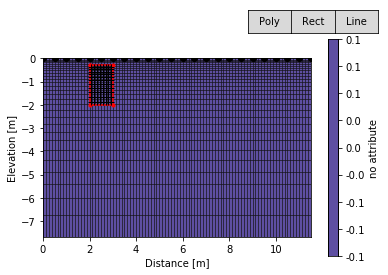

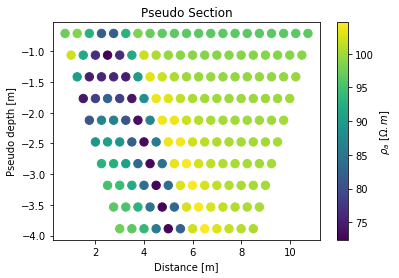

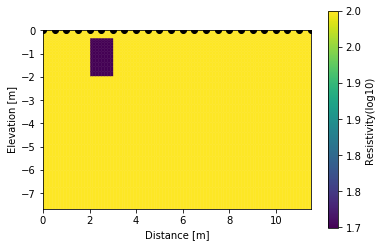

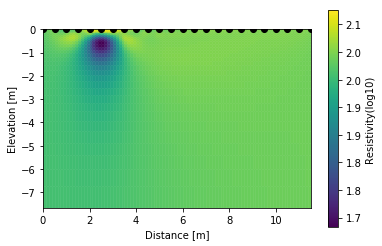

In [12]:
k = R2()

# defining electrode array
x = np.zeros((24, 3))
x[:,0] = np.arange(0, 24*0.5, 0.5)
k.setElec(elec)

# creating mesh
k.createMesh()

# add region
k.addRegion(np.array([[2,-0.3],[2,-2],[3,-2],[3,-0.3],[2,-0.3]]), 50)

# define sequence
k.createSequence([('dpdp1', 1, 10)])

# forward modelling
k.forward(noise=0.0)

# inverse modelling based on forward results
k.invert()

# show the initial and recovered section
k.showResults(index=0) # initial
k.showResults(index=1, sens=False) # recovered
